In [1]:
from fix_functions import *

/home/gustavi_icd/Desktop/Code/star_dataset/.venv/lib/python3.12/site-packages/numpy/_core/numeric.py:387: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/home/gustavi_icd/Desktop/Code/star_dataset/fix_errors_dataset5/fix_checkups/fix_functions.py:50: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Line"] = pd.to_numeric(data["Line"], errors="coerce").fillna(method="ffill")


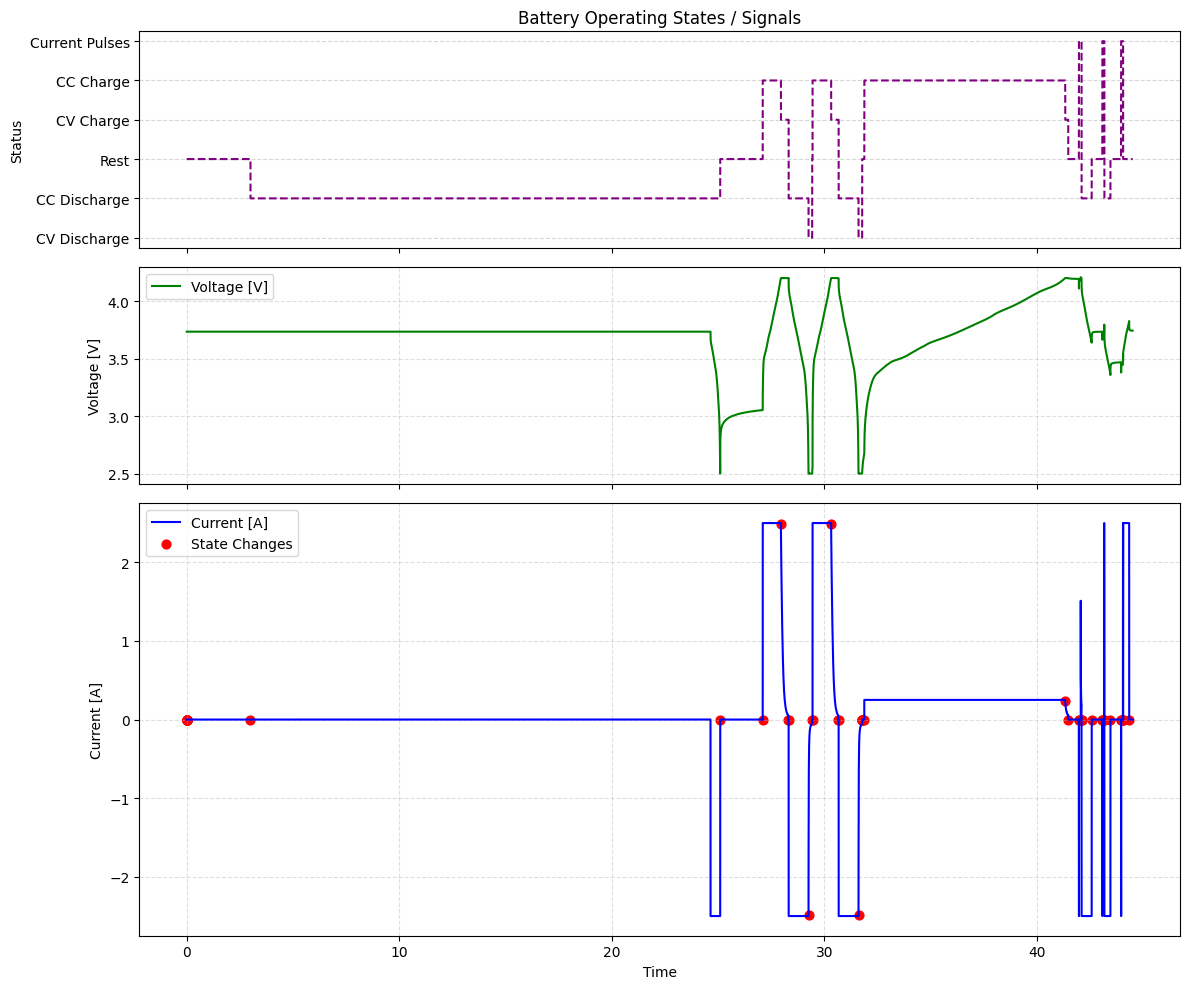

,status,start_time,end_time,duration,avg_current,std_current,avg_tension,std_tension
0,Rest,0.000001,2.991700,2.991699,0.000000,0.000000,3.733513,5.113631e-05
1,CC Discharge,3.005654,25.094543,22.088889,-0.050759,0.354311,3.725938,6.375056e-02
2,Rest,25.103425,27.089536,1.986111,0.000000,0.000000,3.010353,4.274960e-02
3,CC Charge,27.103491,27.950713,0.847222,2.499999,0.000014,3.807935,2.193996e-01
4,CV Charge,27.962897,28.309121,0.346225,0.501849,0.576541,4.199874,2.887538e-04
5,CC Discharge,28.323106,29.248106,0.925000,-2.499999,0.000014,3.612887,3.113008e-01
6,CV Discharge,29.261903,29.420237,0.158333,-0.172927,0.190431,2.499920,7.019615e-05
7,Rest,29.430661,29.433439,0.002778,0.000000,0.000000,2.531015,6.202525e-03
8,CC Charge,29.447393,30.314060,0.866667,2.500000,0.000012,3.792051,2.367742e-01
9,CV Charge,30.325738,30.661411,0.335673,0.506999,0.577550,4.199874,2.775798e-04


In [ ]:
import numpy as np
import os

src = "../data_pub/CU_Calendar/CU006/BW-VTC-174_4105_CU_cal_006_BW-VTC-CAL.mat"

# load original struct 
data1, orig_fields1 = load_cell_data(src)

data1 = process_states(data1)
metrics1 = analyze_metrics_by_status_period(data1)
plot_battery_data(data1)
metrics1

In [3]:
# make numeric / forward-fill as in your pipeline
data1["Line"] = pd.to_numeric(data1["Line"], errors="coerce").fillna(method="ffill")
data1["Time"] = pd.to_numeric(data1["Time"], errors="coerce")

# rows where Line != previous Line
changes = data1.loc[data1["Line"].ne(data1["Line"].shift()), ["Time", "Line"]].reset_index()
# add previous Line value for clarity
changes["prev_Line"] = data1["Line"].shift(1).loc[changes["index"]].values

print(changes[:20])  # shows index, Time, Line, prev_Line

    index          Time  Line  prev_Line
0       0  2.779687e-07     2        NaN
1       1  5.545405e-07     3        2.0
2       2  8.320436e-07     4        3.0
3       3  1.112340e-06     5        4.0
4       4  1.389378e-06     6        5.0
5       5  1.666881e-06     7        6.0
6       6  1.945548e-06     8        7.0
7       7  2.222585e-06     9        8.0
8       8  2.500554e-06    10        9.0
9       9  2.779687e-06    11       10.0
10     10  3.056259e-06    12       11.0
11     11  3.305290e-05    13       12.0
12   1093  3.000098e+00    14       13.0
13   9052  2.509787e+01    15       14.0
14   9774  2.709794e+01    16       15.0
15  10086  2.795456e+01    17       16.0
16  10213  2.830079e+01    18       17.0
17  10221  2.831755e+01    20       18.0
18  10561  2.925357e+01    21       20.0
19  10625  2.942511e+01    22       21.0


/tmp/ipykernel_10060/4149671595.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["Line"] = pd.to_numeric(data1["Line"], errors="coerce").fillna(method="ffill")


In [4]:
# find corrected transition time by looking for the falling edge in I
data1 = data1.copy()
data1["Time"] = pd.to_numeric(data1["Time"], errors="coerce")
data1["I"] = pd.to_numeric(data1["I"], errors="coerce")
data1 = data1.sort_values("Time").reset_index(drop=True)

# recompute change rows (original index is in 'index' column)
data1["Line"] = pd.to_numeric(data1["Line"], errors="coerce").fillna(method="ffill")
changes = data1.loc[data1["Line"].ne(data1["Line"].shift()), ["Time", "Line"]].reset_index()

# problem original index
bad_orig_idx = 1093

if bad_orig_idx not in changes["index"].values:
    print("Bad index not found in changes; available change original indices:", changes["index"].tolist())
else:
    # recorded time and run values
    recorded_time = float(data1.at[bad_orig_idx, "Time"])
    prev_line = float(data1["Line"].shift(1).loc[bad_orig_idx])
    curr_line = float(data1.at[bad_orig_idx, "Line"])

    # gradient over whole series
    times = data1["Time"].to_numpy()
    I = data1["I"].to_numpy()
    grad = np.gradient(I, times)

    # choose search window
    if ((times >= 20) & (times <= 26)).sum() > 10:
        mask = (times >= 20) & (times <= 26)
    else:
        mask = (times >= (recorded_time - 5)) & (times <= (recorded_time + 5))

    if mask.sum() == 0:
        print("No samples in search window. Inspect time range or widen window.")
    else:
        # find index of largest negative slope inside window
        rel_indices = np.where(mask)[0]
        rel_idx = int(np.nanargmin(grad[rel_indices]))
        corrected_idx = rel_indices[rel_idx]
        corrected_time = float(times[corrected_idx])

        print(f"bad_orig_idx={bad_orig_idx}, recorded_time={recorded_time:.6e}")
        print(f"prev_line={prev_line}, curr_line={curr_line}")
        print(f"corrected_idx={corrected_idx}, corrected_time={corrected_time:.6e}")
        print(f"dI/dt at corrected index = {grad[corrected_idx]:.6e}")
        # show a small neighbourhood
        neigh = data1.loc[max(0, corrected_idx-5):corrected_idx+5, ["Time", "I", "Line"]]
        print(neigh.to_string(index=True))

bad_orig_idx=1093, recorded_time=3.000098e+00
prev_line=13.0, curr_line=14.0
corrected_idx=8885, corrected_time=2.464177e+01
dI/dt at corrected index = -4.500771e+02
           Time         I  Line
8880  24.627876  0.000414    14
8881  24.630654  0.000387    14
8882  24.633432  0.000423    14
8883  24.636210  0.000360    14
8884  24.638987  0.000414    14
8885  24.641765  0.000423    14
8886  24.644543 -2.500016    14
8887  24.647321 -2.500007    14
8888  24.650098 -2.500016    14
8889  24.652876 -2.499998    14
8890  24.655654 -2.499962    14


/tmp/ipykernel_10060/4077085064.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["Line"] = pd.to_numeric(data1["Line"], errors="coerce").fillna(method="ffill")


/home/gustavi_icd/Desktop/Code/star_dataset/.venv/lib/python3.12/site-packages/scipy/io/matlab/_mio5.py:659: MatWriteWarning: Starting field name with a underscore or a digit (_fieldnames) is ignored
  narr = to_writeable(arr)


Saved fixed .mat: /home/gustavi_icd/Desktop/Code/star_dataset/fix_errors_dataset5/fix_checkups/CU_4105_fixed.mat


/home/gustavi_icd/Desktop/Code/star_dataset/.venv/lib/python3.12/site-packages/numpy/_core/numeric.py:387: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')
/home/gustavi_icd/Desktop/Code/star_dataset/fix_errors_dataset5/fix_checkups/fix_functions.py:50: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Line"] = pd.to_numeric(data["Line"], errors="coerce").fillna(method="ffill")


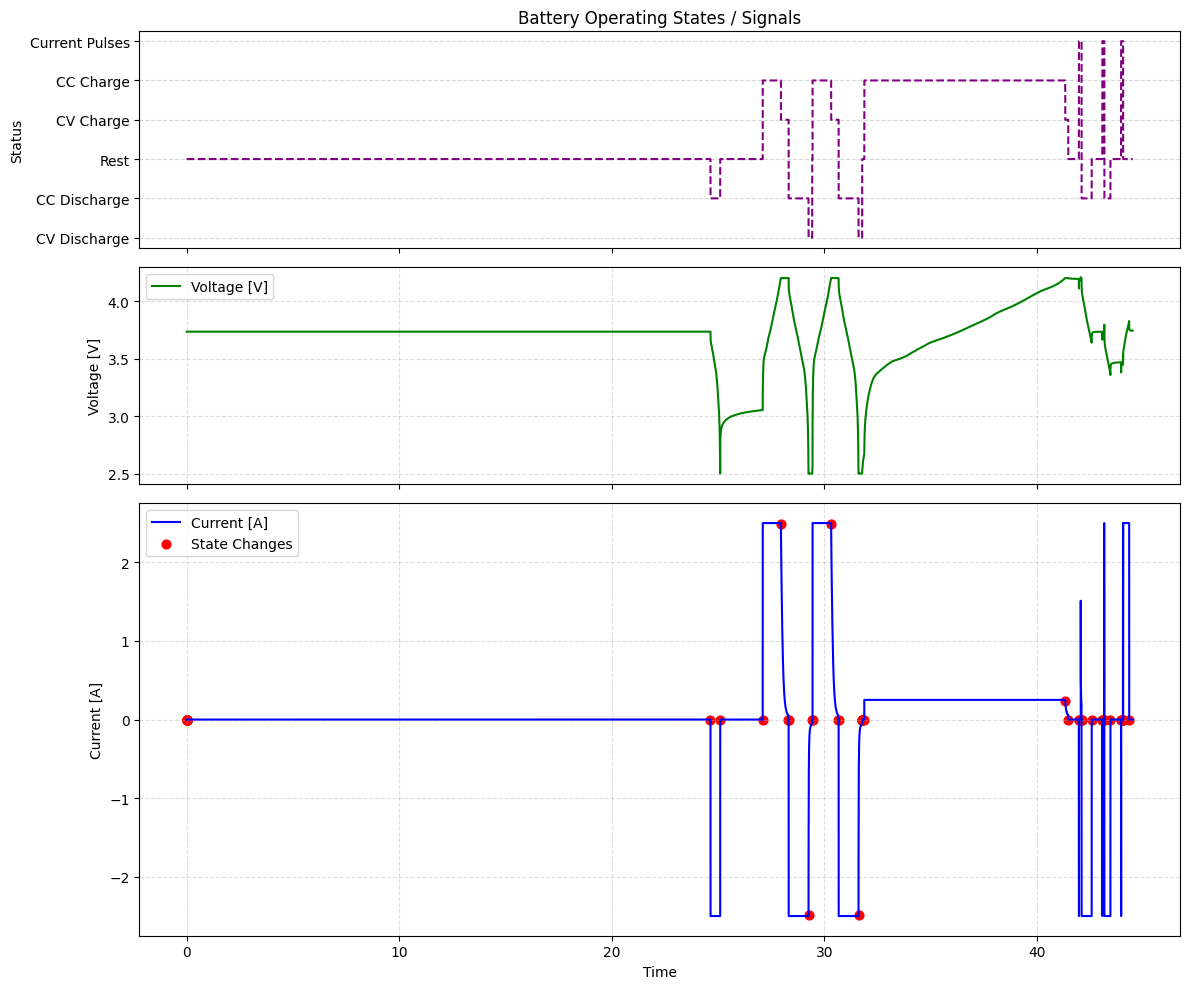

,status,start_time,end_time,duration,avg_current,std_current,avg_tension,std_tension
0,Rest,0.000001,24.630654,24.630653,0.000430,0.000201,3.733637,1.224970e-04
1,CC Discharge,24.650098,25.094543,0.444444,-2.500000,0.000015,3.353251,2.434828e-01
2,Rest,25.103425,27.089536,1.986111,0.000000,0.000000,3.010353,4.274960e-02
3,CC Charge,27.103491,27.950713,0.847222,2.499999,0.000014,3.807935,2.193996e-01
4,CV Charge,27.962897,28.309121,0.346225,0.501849,0.576541,4.199874,2.887538e-04
5,CC Discharge,28.323106,29.248106,0.925000,-2.499999,0.000014,3.612887,3.113008e-01
6,CV Discharge,29.261903,29.420237,0.158333,-0.172927,0.190431,2.499920,7.019615e-05
7,Rest,29.430661,29.433439,0.002778,0.000000,0.000000,2.531015,6.202525e-03
8,CC Charge,29.447393,30.314060,0.866667,2.500000,0.000012,3.792051,2.367742e-01
9,CV Charge,30.325738,30.661411,0.335673,0.506999,0.577550,4.199874,2.775798e-04


In [5]:
out = "CU_4105_fixed.mat"
line = np.asarray(data1["Line"]).copy()
line[11:8885] = 13
data1["Line"] = line

# orig_fields1 is now a dict returned by load_cell_data
# override only the Line field and save all other original fields intact
updated_fields = {"Line": np.asarray(data1["Line"])}
save_cell_data(orig_fields1, out, updated_fields=updated_fields)
print("Saved fixed .mat:", os.path.abspath(out))

# reload to verify
data2, orig_fields2 = load_cell_data(out)
data2 = process_states(data2)
metrics2 = analyze_metrics_by_status_period(data2)
plot_battery_data(data2)
metrics2